# Capstone Projoect: Maternal Health

## Maternal Sepsis by Select Risk Factors

Source: https://healthdata.gov/State/Maternal-Sepsis-by-Select-Risk-Factors-SPARCS-2016/gy4j-ef7j

Additional Information: https://health.data.ny.gov/Health/Maternal-Sepsis-by-Select-Risk-Factors-SPARCS-2016/p9ay-x62y

## Questions:

- What are the 10 most risk factors to get a sepsis during the maternal window?

- From this top ten, which are statistically significant? p-value < 0.05

- What are the top 10 statistically signicifant risk factors for any sepsis?

- What are the top 10 statistically signicifant risk factors for severe sepsis?

- What are the top 10 risk factors with the highest incidence for any sepsis?

- What are the top 10 risk factors with the highest incidence for severe sepsis?
        
        
        

## Imports

In [312]:
pip install scikit-learn


     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
      --------------------------------------- 0.1/8.4 MB 3.3 MB/s eta 0:00:03
     -- ------------------------------------- 0.5/8.4 MB 6.6 MB/s eta 0:00:02
     --- ------------------------------------ 0.8/8.4 MB 6.6 MB/s eta 0:00:02
     ------ --------------------------------- 1.3/8.4 MB 7.6 MB/s eta 0:00:01
     -------- ------------------------------- 1.8/8.4 MB 7.7 MB/s eta 0:00:01
     ----------- ---------------------------- 2.3/8.4 MB 8.3 MB/s eta 0:00:01
     -------------- ------------------------- 2.9/8.4 MB 9.4 MB/s eta 0:00:01
     ---------------- ----------------------- 3.4/8.4 MB 8.9 MB/s eta 0:00:01
     ------------------ --------------------- 3.9/8.4 MB 9.3 MB/s eta 0:00:01
     -------------------- ------------------- 4.3/8.4 MB 9.2 MB/s eta 0:00:01
     --------------------- ------------------ 4.5/8.4 MB 9.3 MB/s eta 0:00:01
     --------------------- ------------------ 4.5/8.4 MB 9.3 MB/s eta 0

In [313]:
import numpy as np
import pandas as pd
import requests

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans

In [9]:
#Set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)  

base_color = sns.color_palette('pastel')[0]
pregnancy_color = sns.color_palette('pastel')[1]
delivery_color = sns.color_palette('pastel')[2]
postpartum_color = sns.color_palette('pastel')[4]


def beschriftung_diagramm(x_label,y_label,title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

## Load the data

In [10]:
df = pd.read_csv('Maternal_Sepsis_by_Select_Risk_Factors__SPARCS__2016-2018.csv')
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(',', '', regex=False)



C:\Users\Laura Hagg\AppData\Local\Temp\ipykernel_7392\1760907668.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(',', '', regex=False)
C:\Users\Laura Hagg\AppData\Local\Temp\ipykernel_7392\1760907668.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(',', '', regex=False)


In [11]:
df.head(10)

,Years_of_Live_Birth,Maternal_Window,Data_Source,Risk_Factor_Type,Risk_Factor,Risk_Factor_Strata,Live_Births_N,Live_Births_%,Any_Sepsis_Incidence_N,Any_Sepsis_Incidence_per_100000_Live_Births,Any_Sepsis_Crude_Odds_Ratio_95%_CI,Any_Sepsis_p-value,Severe_Sepsis_Incidence_N,Severe_Sepsis_Incidence_per_100000_Live_Births,Severe_Sepsis_Crude_Odds_Ratio_95%_CI,Severe_Sepsis_p-value
0,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Alcohol abuse,No,638839,99.82,532,83.28,ref,NaN,124,19.41,ref,NaN
1,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Alcohol abuse,Yes,1184,0.18,5,422.30,5.09 (2.11-12.30),0.0003,1,84.46,4.36 (0.61-31.18),0.1426
2,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Asthma,No,596372,93.18,449,75.29,ref,NaN,101,16.94,ref,NaN
3,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Asthma,Yes,43651,6.82,88,201.60,2.68 (2.13-3.37),<.0001,24,54.98,3.25 (2.08-5.07),<.0001
4,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Cardiac valvular disease,No,637840,99.66,527,82.62,ref,NaN,124,19.44,ref,NaN
5,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Cardiac valvular disease,Yes,2183,0.34,10,458.09,5.57 (2.97-10.42),<.0001,1,45.81,2.36 (0.33-16.87),0.3932
6,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Chronic congestive heart failure,No,639881,99.98,535,83.61,ref,NaN,124,19.38,ref,NaN
7,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Chronic congestive heart failure,Yes,142,0.02,2,1408.45,17.09 (4.23-69.15),<.0001,1,704.23,36.67 (5.10-263.7),0.0003
8,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Chronic ischemic heart disease,No,639637,99.94,535,83.64,ref,NaN,123,19.23,ref,NaN
9,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Chronic ischemic heart disease,Yes,386,0.06,2,518.13,6.22 (1.55-25.03),0.0101,2,518.13,27.08 (6.67-109.9),<.0001


In [269]:
list(df.columns)

['Years_of_Live_Birth',
 'Maternal_Window',
 'Data_Source',
 'Risk_Factor_Type',
 'Risk_Factor',
 'Risk_Factor_Strata',
 'Live_Births_N',
 'Live_Births_%',
 'Any_Sepsis_Incidence_N',
 'Any_Sepsis_Incidence_per_100000_Live_Births',
 'Any_Sepsis_Crude_Odds_Ratio_95%_CI',
 'Any_Sepsis_p-value',
 'Severe_Sepsis_Incidence_N',
 'Severe_Sepsis_Incidence_per_100000_Live_Births',
 'Severe_Sepsis_Crude_Odds_Ratio_95%_CI',
 'Severe_Sepsis_p-value']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Years_of_Live_Birth                             585 non-null    object 
 1   Maternal_Window                                 585 non-null    object 
 2   Data_Source                                     585 non-null    object 
 3   Risk_Factor_Type                                585 non-null    object 
 4   Risk_Factor                                     585 non-null    object 
 5   Risk_Factor_Strata                              585 non-null    object 
 6   Live_Births_N                                   585 non-null    int64  
 7   Live_Births_%                                   585 non-null    float64
 8   Any_Sepsis_Incidence_N                          585 non-null    int64  
 9   Any_Sepsis_Incidence_per_100000_Live_Births

## Cleaning

### Change datatypes

In [17]:
#Change the datatype of the p-value (any sepsis and severe sepsis) to a float
df['Any_Sepsis_p-value'] = df['Any_Sepsis_p-value'].str.replace('<.0001', '0.0001').astype(float)
df['Severe_Sepsis_p-value'] = df['Severe_Sepsis_p-value'].str.replace('<.0001', '0.0001').astype(float)



C:\Users\Laura Hagg\AppData\Local\Temp\ipykernel_7392\340680102.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Any_Sepsis_p-value'] = df['Any_Sepsis_p-value'].str.replace('<.0001', '0.0001').astype(float)
C:\Users\Laura Hagg\AppData\Local\Temp\ipykernel_7392\340680102.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Severe_Sepsis_p-value'] = df['Severe_Sepsis_p-value'].str.replace('<.0001', '0.0001').astype(float)


In the first step i have to clean the data

### Tabacco use = Tabacco Use
### Alcohol use  = Alcohol abusus

In [18]:
df[df['Risk_Factor'] == 'Tobacco Use']

,Years_of_Live_Birth,Maternal_Window,Data_Source,Risk_Factor_Type,Risk_Factor,Risk_Factor_Strata,Live_Births_N,Live_Births_%,Any_Sepsis_Incidence_N,Any_Sepsis_Incidence_per_100000_Live_Births,Any_Sepsis_Crude_Odds_Ratio_95%_CI,Any_Sepsis_p-value,Severe_Sepsis_Incidence_N,Severe_Sepsis_Incidence_per_100000_Live_Births,Severe_Sepsis_Crude_Odds_Ratio_95%_CI,Severe_Sepsis_p-value
106,2016-2018,Pregnancy,Birth certificate,Other Comorbidities,Tobacco Use,No,576262,93.07,466,80.87,ref,NaN,113,19.61,ref,NaN
107,2016-2018,Pregnancy,Birth certificate,Other Comorbidities,Tobacco Use,Yes,42128,6.80,52,123.43,1.53 (1.15-2.03),0.0038,9,21.36,1.09 (0.55-2.15),0.8046
108,2016-2018,Pregnancy,Birth certificate,Other Comorbidities,Tobacco Use,Unknown,752,0.12,2,265.96,3.30 (0.82-13.25),0.0921,0,0.00,<0.001 (<0.001->999.99),0.9793
253,2016-2018,Delivery,Birth certificate,Other Comorbidities,Tobacco Use,No,576262,93.07,572,99.26,ref,NaN,104,18.05,ref,NaN
254,2016-2018,Delivery,Birth certificate,Other Comorbidities,Tobacco Use,Yes,42128,6.80,48,113.94,1.15 (0.86-1.54),0.3585,14,33.23,1.84 (1.05-3.22),0.0320
255,2016-2018,Delivery,Birth certificate,Other Comorbidities,Tobacco Use,Unknown,752,0.12,7,930.85,9.46 (4.48-20.00),0.0001,4,531.91,29.63 (10.89-80.63),0.0001
472,2016-2018,Postpartum,Birth certificate,Other Comorbidities,Tobacco Use,No,576262,93.07,686,119.04,ref,NaN,109,18.92,ref,NaN
473,2016-2018,Postpartum,Birth certificate,Other Comorbidities,Tobacco Use,Yes,42128,6.80,70,166.16,1.40 (1.09-1.79),0.0078,12,28.48,1.51 (0.83-2.73),0.1782
474,2016-2018,Postpartum,Birth certificate,Other Comorbidities,Tobacco Use,Unknown,752,0.12,1,132.98,1.12 (0.16-7.95),0.9119,0,0.00,<0.001 (<0.001->999.99),0.9795


In [19]:
df[df['Risk_Factor'] == 'Tobacco use']

,Years_of_Live_Birth,Maternal_Window,Data_Source,Risk_Factor_Type,Risk_Factor,Risk_Factor_Strata,Live_Births_N,Live_Births_%,Any_Sepsis_Incidence_N,Any_Sepsis_Incidence_per_100000_Live_Births,Any_Sepsis_Crude_Odds_Ratio_95%_CI,Any_Sepsis_p-value,Severe_Sepsis_Incidence_N,Severe_Sepsis_Incidence_per_100000_Live_Births,Severe_Sepsis_Crude_Odds_Ratio_95%_CI,Severe_Sepsis_p-value
46,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Tobacco use,No,608267,95.04,466,76.61,ref,NaN,116,19.07,ref,NaN
47,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Tobacco use,Yes,31756,4.96,71,223.58,2.92 (2.28-3.75),0.0001,9,28.34,1.49 (0.75-2.93),0.2522
193,2016-2018,Delivery,SPARCS,Bateman Comorbidities,Tobacco use,No,608267,95.04,618,101.60,ref,NaN,121,19.89,ref,NaN
194,2016-2018,Delivery,SPARCS,Bateman Comorbidities,Tobacco use,Yes,31756,4.96,52,163.75,1.61 (1.21-2.14),0.0009,13,40.94,2.06 (1.16-3.65),0.0133
412,2016-2018,Postpartum,SPARCS,Bateman Comorbidities,Tobacco use,No,608267,95.04,697,114.59,ref,NaN,113,18.58,ref,NaN
413,2016-2018,Postpartum,SPARCS,Bateman Comorbidities,Tobacco use,Yes,31756,4.96,61,192.09,1.68 (1.29-2.18),0.0001,8,25.19,1.36 (0.66-2.78),0.4033


In [20]:
df[df['Risk_Factor'] == 'Alcohol Use']

,Years_of_Live_Birth,Maternal_Window,Data_Source,Risk_Factor_Type,Risk_Factor,Risk_Factor_Strata,Live_Births_N,Live_Births_%,Any_Sepsis_Incidence_N,Any_Sepsis_Incidence_per_100000_Live_Births,Any_Sepsis_Crude_Odds_Ratio_95%_CI,Any_Sepsis_p-value,Severe_Sepsis_Incidence_N,Severe_Sepsis_Incidence_per_100000_Live_Births,Severe_Sepsis_Crude_Odds_Ratio_95%_CI,Severe_Sepsis_p-value
92,2016-2018,Pregnancy,Birth certificate,Other Comorbidities,Alcohol Use,No,612201,98.88,512,83.63,ref,NaN,122,19.93,ref,NaN
93,2016-2018,Pregnancy,Birth certificate,Other Comorbidities,Alcohol Use,Yes,5455,0.88,6,109.99,1.32 (0.59-2.94),0.5045,0,0.00,<0.001 (<0.001->999.99),0.9754
94,2016-2018,Pregnancy,Birth certificate,Other Comorbidities,Alcohol Use,Unknown,1486,0.24,2,134.59,1.61 (0.40-6.46),0.5017,0,0.00,<0.001 (<0.001->999.99),0.9871
239,2016-2018,Delivery,Birth certificate,Other Comorbidities,Alcohol Use,No,612201,98.88,613,100.13,ref,NaN,117,19.11,ref,NaN
240,2016-2018,Delivery,Birth certificate,Other Comorbidities,Alcohol Use,Yes,5455,0.88,5,91.66,0.92 (0.38-2.21),0.8439,2,36.66,1.92 (0.47-7.77),0.3609
241,2016-2018,Delivery,Birth certificate,Other Comorbidities,Alcohol Use,Unknown,1486,0.24,9,605.65,6.08 (3.14-11.76),0.0001,3,201.88,10.58 (3.36-33.33),0.0001
458,2016-2018,Postpartum,Birth certificate,Other Comorbidities,Alcohol Use,No,612201,98.88,752,122.84,ref,NaN,120,19.60,ref,NaN
459,2016-2018,Postpartum,Birth certificate,Other Comorbidities,Alcohol Use,Yes,5455,0.88,5,91.66,0.75 (0.31-1.80),0.5138,1,18.33,0.94 (0.13-6.69),0.9468
460,2016-2018,Postpartum,Birth certificate,Other Comorbidities,Alcohol Use,Unknown,1486,0.24,0,0.00,<0.001 (<0.001->999.99),0.9517,0,0.00,<0.001 (<0.001->999.99),0.9807


In [21]:
df[df['Risk_Factor'] == 'Alcohol abuse']

,Years_of_Live_Birth,Maternal_Window,Data_Source,Risk_Factor_Type,Risk_Factor,Risk_Factor_Strata,Live_Births_N,Live_Births_%,Any_Sepsis_Incidence_N,Any_Sepsis_Incidence_per_100000_Live_Births,Any_Sepsis_Crude_Odds_Ratio_95%_CI,Any_Sepsis_p-value,Severe_Sepsis_Incidence_N,Severe_Sepsis_Incidence_per_100000_Live_Births,Severe_Sepsis_Crude_Odds_Ratio_95%_CI,Severe_Sepsis_p-value
0,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Alcohol abuse,No,638839,99.82,532,83.28,ref,NaN,124,19.41,ref,NaN
1,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Alcohol abuse,Yes,1184,0.18,5,422.30,5.09 (2.11-12.30),0.0003,1,84.46,4.36 (0.61-31.18),0.1426
147,2016-2018,Delivery,SPARCS,Bateman Comorbidities,Alcohol abuse,No,638839,99.82,668,104.56,ref,NaN,132,20.66,ref,NaN
148,2016-2018,Delivery,SPARCS,Bateman Comorbidities,Alcohol abuse,Yes,1184,0.18,2,168.92,1.62 (0.40-6.48),0.4980,2,168.92,8.19 (2.02-33.12),0.0032
366,2016-2018,Postpartum,SPARCS,Bateman Comorbidities,Alcohol abuse,No,638839,99.82,757,118.50,ref,NaN,121,18.94,ref,NaN
367,2016-2018,Postpartum,SPARCS,Bateman Comorbidities,Alcohol abuse,Yes,1184,0.18,1,84.46,0.71 (0.10-5.07),0.7357,0,0.00,<0.001 (<0.001->999.99),0.9746


In [22]:
df_clean = df[~df['Risk_Factor'].isin(['Alcohol Use', 'Tobacco Use'])]

In the dataframe there are two riskfactors twice: 
- Taoacco use (& Tobacco Use)
- Alcohol use (& Alcohol abuse)

The reason is, that the data is from two data sources: SPARCS and Birth Certificate. 

I have three options:
1. Let the data as it is.
2. Count the data togheter.
3. Remove one of the risk factors.

So I decided to remove one of these risk factors, so they are not twice in the data analysis. I will remove these risk factors from the data source 'Birth certificate', because the risk factor stata is devided into three parts: yes, no and unknown. Most of the other risk factors have only two options: yes and no. So for the further analysis is will be easier to explore the alcohol and tobacco use from the SPARCS source.

## Prepare Dataframes for Analysis

In [23]:
risk_yes = df_clean[df_clean['Risk_Factor_Strata'] == 'Yes']

risk_no = df_clean[df_clean['Risk_Factor_Strata'] == 'No']

risk_yes_no = df_clean[df_clean['Risk_Factor_Strata'].isin(['No', 'Yes'])]

## Analysis

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567 entries, 0 to 584
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Years_of_Live_Birth                             567 non-null    object 
 1   Maternal_Window                                 567 non-null    object 
 2   Data_Source                                     567 non-null    object 
 3   Risk_Factor_Type                                567 non-null    object 
 4   Risk_Factor                                     567 non-null    object 
 5   Risk_Factor_Strata                              567 non-null    object 
 6   Live_Births_N                                   567 non-null    int64  
 7   Live_Births_%                                   567 non-null    float64
 8   Any_Sepsis_Incidence_N                          567 non-null    int64  
 9   Any_Sepsis_Incidence_per_100000_Live_Births

In [25]:
#unique values for some columns
columns = ['Years_of_Live_Birth',
 'Maternal_Window',
 'Data_Source',
 'Risk_Factor_Type',
 'Risk_Factor',
 'Risk_Factor_Strata']
for column in columns:
    print(df[column].unique())


['2016-2018']
['Pregnancy' 'Delivery' 'Postpartum']
['SPARCS' 'Birth certificate' 'SPARCS & Birth certificate']
['Bateman Comorbidities' 'Elixhauser Comorbidities' 'Other Comorbidities'
 'Demographics' 'Obstetric']
['Alcohol abuse' 'Asthma' 'Cardiac valvular disease'
 'Chronic congestive heart failure' 'Chronic ischemic heart disease'
 'Chronic renal disease' 'Congenital heart disease' 'Cystic fibrosis'
 'Drug abuse' 'Gestational diabetes mellitus' 'Gestational hypertension'
 'Human immunodeficiency virus'
 'Mild preeclampsia or unspecified preeclampsia' 'Multiple gestation'
 'Obesity' 'Placenta previa' 'Preexisting diabetes mellitus'
 'Preexisting hypertension' 'Previous cesarean delivery'
 'Pulmonary hypertension' 'Severe preeclampsia/eclampsia'
 'Sickle cell disease' 'Systemic lupus erythematosus' 'Tobacco use'
 'Blood loss anaemia' 'Cardiac arrhythmias' 'Chronic pulmonary disease'
 'Coagulopathy' 'Deficiency anaemia' 'Depression'
 'Fluid and electrolyte disorders' 'Hypothyroidism' 

In [26]:
df.describe()

,Live_Births_N,Live_Births_%,Any_Sepsis_Incidence_N,Any_Sepsis_Incidence_per_100000_Live_Births,Any_Sepsis_p-value,Severe_Sepsis_Incidence_N,Severe_Sepsis_Incidence_per_100000_Live_Births,Severe_Sepsis_p-value
count,585.000000,585.000000,585.000000,585.000000,332.000000,585.000000,585.000000,332.000000
mean,275475.593162,43.214325,289.001709,513.954940,0.222433,54.536752,246.649624,0.378948
std,290965.118214,45.618133,299.848109,1835.442843,0.347062,54.855905,1284.275285,0.418585
min,1.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000100
25%,2826.000000,0.440000,11.000000,94.950000,0.000100,3.000000,18.110000,0.001550
50%,89369.000000,13.960000,109.000000,117.270000,0.004700,24.000000,19.570000,0.134500
75%,627420.000000,98.240000,618.000000,199.090000,0.365125,119.000000,35.110000,0.935175
max,640022.000000,100.000000,758.000000,17280.450000,0.986300,134.000000,16666.670000,0.994000


### Number of Births

In [27]:
df_clean['Live_Births_N'].sum()

157438370

### Data Source

In [28]:
df_clean['Data_Source'].value_counts()

SPARCS                        453
Birth certificate              60
SPARCS & Birth certificate     54
Name: Data_Source, dtype: int64

### Maternal Window

In [29]:
df_clean['Maternal_Window'].value_counts()

Delivery      213
Postpartum    213
Pregnancy     141
Name: Maternal_Window, dtype: int64

In [30]:
df.groupby('Maternal_Window')['Any_Sepsis_Incidence_per_100000_Live_Births'].mean()

Maternal_Window
Delivery      941.130411
Postpartum    275.152557
Pregnancy     233.317483
Name: Any_Sepsis_Incidence_per_100000_Live_Births, dtype: float64

### Risk Factor Type

In [32]:
df_clean['Risk_Factor_Type'].value_counts()

Obstetric                   180
Bateman Comorbidities       144
Elixhauser Comorbidities    132
Demographics                 78
Other Comorbidities          33
Name: Risk_Factor_Type, dtype: int64

In [33]:
df.groupby('Risk_Factor_Type')['Any_Sepsis_Incidence_per_100000_Live_Births'].mean()

Risk_Factor_Type
Bateman Comorbidities        267.136111
Demographics                 117.084231
Elixhauser Comorbidities     291.990985
Obstetric                   1124.367167
Other Comorbidities          237.932745
Name: Any_Sepsis_Incidence_per_100000_Live_Births, dtype: float64

### Risk Factor Strata

In [35]:
df_clean['Risk_Factor_Strata'].value_counts()

No                                             232
Yes                                            232
Unknown                                         19
Multi-Racial, Non-Hispanic                       3
2nd                                              3
1st                                              3
No NYS County                                    3
Western                                          3
Utica-Adirondack                                 3
Northern Metro                                   3
Northeast                                        3
New York City                                    3
Mid-Hudson                                       3
Long Island                                      3
Finger Lakes                                     3
Central                                          3
Asian/Pacific Islander, Non-Hispanic             3
Other, Non-Hispanic                              3
Native American/Alaska Native, Non-Hispanic      3
Hispanic                       

### Risk Factor

In [36]:
df_clean['Risk_Factor'].value_counts()

Region of Residence                                         30
Race/Ethnicity                                              21
Education                                                   18
Trimester Beginning Prenatal Care                           12
Nulliparity                                                  9
Multiple Gestation                                           9
Illegal Drug Use                                             9
Age Group                                                    9
Peptic ulcer disease, excluding bleeding                     6
Pulmonary circulation disorders                              6
Psychoses                                                    6
Peripheral vascular disorders                                6
Alcohol abuse                                                6
Paralysis                                                    6
Rheumatoid arthritis/collagen vascular diseases              6
Other neurological disorders                           

In [37]:
set(df_clean['Risk_Factor'].tolist())

{'3rd or 4th degree tears',
 'ART',
 'Abnormal placentation',
 'Acute myocardial infarction',
 'Acute renal failure',
 'Adult respiratory distress syndrome',
 'Age Group',
 'Air and thrombotic embolism',
 'Alcohol abuse',
 'Amniotic fluid embolism',
 'Aneurysm',
 'Asthma',
 'Blood loss anaemia',
 'Blood products transfusion',
 'Cardiac arrest/ventricular fibrillation',
 'Cardiac arrhythmias',
 'Cardiac valvular disease',
 'Cerclage (rescue>prophylactic)',
 'Cesarean Delivery',
 'Chronic congestive heart failure',
 'Chronic ischemic heart disease',
 'Chronic pulmonary disease',
 'Chronic renal disease',
 'Coagulopathy',
 'Congenital heart disease',
 'Conversion of cardiac rhythm',
 'Cystic fibrosis',
 'Deficiency anaemia',
 'Depression',
 'Disseminated intravascular coagulation',
 'Drug abuse',
 'Eclampsia',
 'Education',
 'Episiotomy',
 'Fluid and electrolyte disorders',
 'Gestational diabetes mellitus',
 'Gestational hypertension',
 'Group B Strep Carrier',
 'Heart failure/arrest duri

In [38]:
#risk factors for all data points
risk_factors = sorted(set(df_clean['Risk_Factor'].tolist()))

for risk in risk_factors:
    df_filtered = df_clean[(df_clean['Risk_Factor'] == risk) & (df_clean['Maternal_Window'] == 'Delivery')]
    df_sum = df_filtered['Live_Births_N'].sum()
    print(f"Sum for Risk Factor '{risk}': {df_sum}")


    

Sum for Risk Factor '3rd or 4th degree tears': 619142
Sum for Risk Factor 'ART': 619142
Sum for Risk Factor 'Abnormal placentation': 640023
Sum for Risk Factor 'Acute myocardial infarction': 640023
Sum for Risk Factor 'Acute renal failure': 640023
Sum for Risk Factor 'Adult respiratory distress syndrome': 640023
Sum for Risk Factor 'Age Group': 640023
Sum for Risk Factor 'Air and thrombotic embolism': 640023
Sum for Risk Factor 'Alcohol abuse': 640023
Sum for Risk Factor 'Amniotic fluid embolism': 640023
Sum for Risk Factor 'Aneurysm': 640023
Sum for Risk Factor 'Asthma': 640023
Sum for Risk Factor 'Blood loss anaemia': 640023
Sum for Risk Factor 'Blood products transfusion': 640023
Sum for Risk Factor 'Cardiac arrest/ventricular fibrillation': 640023
Sum for Risk Factor 'Cardiac arrhythmias': 640023
Sum for Risk Factor 'Cardiac valvular disease': 640023
Sum for Risk Factor 'Cerclage (rescue>prophylactic)': 619142
Sum for Risk Factor 'Cesarean Delivery': 619142
Sum for Risk Factor 'Chr

In [39]:
#for the risk-yes dataframe
risk_factors = set(risk_yes['Risk_Factor'].tolist())

for risk in risk_factors:
    risk_yes_filtered = risk_yes[(risk_yes['Risk_Factor'] == risk) & (risk_yes['Maternal_Window'] == 'Delivery')]
    risk_yes_number = risk_yes_filtered['Live_Births_N'].values[0]
    print(f"Sum for Risk Factor '{risk}': {risk_yes_number}")



Sum for Risk Factor 'Prolonged labor': 1731
Sum for Risk Factor 'Sickle cell disease': 10948
Sum for Risk Factor 'Shock': 391
Sum for Risk Factor 'Puerperal cerebrovascular disorders': 43
Sum for Risk Factor 'Liver disease': 4516
Sum for Risk Factor 'Amniotic fluid embolism': 22
Sum for Risk Factor 'Severe anesthesia complications': 37
Sum for Risk Factor '3rd or 4th degree tears': 10825
Sum for Risk Factor 'Alcohol abuse': 1184
Sum for Risk Factor 'Other Immunosupression': 689
Sum for Risk Factor 'Placenta previa': 11417
Sum for Risk Factor 'Air and thrombotic embolism': 132
Sum for Risk Factor 'Cesarean Delivery': 209421
Sum for Risk Factor 'Valvular disease': 2362
Sum for Risk Factor 'Multiple Gestation': 11002
Sum for Risk Factor 'Fluid and electrolyte disorders': 11270
Sum for Risk Factor 'Pulmonary circulation disorders': 302
Sum for Risk Factor 'Cardiac arrhythmias': 215
Sum for Risk Factor 'Chronic ischemic heart disease': 386
Sum for Risk Factor 'Retained Products of Conceptio

### Top ten risk factors. Independent if there is a sepsis or not

### Pregnancy

In [40]:
#Top 10 during Pregancy

def top_10_risk_factors(maternal_window):
    risk_factors = set(risk_yes['Risk_Factor'].tolist())
    sum_data = []

    for risk in risk_factors:
        risk_yes_filtered = risk_yes[(risk_yes['Risk_Factor'] == risk) & (risk_yes['Maternal_Window'] == maternal_window)]
        risk_yes_sum = risk_yes_filtered['Live_Births_N'].sum()
        sum_data.append({'Risk_Factor': risk, 'Live_Births_N': risk_yes_sum})

    risk_yes_sum = pd.DataFrame(sum_data)

    top_10_risk_factors = risk_yes_sum.sort_values(by='Live_Births_N', ascending=False).head(10)
    top_10_risk_factors = top_10_risk_factors.reset_index(drop=True)
    
    return top_10_risk_factors

top_10_during_pregnancy = top_10_risk_factors('Pregnancy')
top_10_during_pregnancy

,Risk_Factor,Live_Births_N
0,Nulliparity,188819
1,Group B Strep Carrier,127776
2,Previous cesarean delivery,115630
3,Obesity,90289
4,Blood loss anaemia,77802
5,Gestational diabetes mellitus,56628
6,Deficiency anaemia,49184
7,Chronic pulmonary disease,44414
8,Asthma,43651
9,Gestational hypertension,41188


In [41]:
#Top 10 during Delivery

def top_10_risk_factors(maternal_window):
    risk_factors = set(risk_yes['Risk_Factor'].tolist())
    sum_data = []

    for risk in risk_factors:
        risk_yes_filtered = risk_yes[(risk_yes['Risk_Factor'] == risk) & (risk_yes['Maternal_Window'] == maternal_window)]
        risk_yes_sum = risk_yes_filtered['Live_Births_N'].sum()
        sum_data.append({'Risk_Factor': risk, 'Live_Births_N': risk_yes_sum})

    risk_yes_sum = pd.DataFrame(sum_data)

    top_10_risk_factors = risk_yes_sum.sort_values(by='Live_Births_N', ascending=False).head(10)
    top_10_risk_factors = top_10_risk_factors.reset_index(drop=True)
    
    return top_10_risk_factors

top_10_during_delivery = top_10_risk_factors('Delivery')
top_10_during_delivery

,Risk_Factor,Live_Births_N
0,Induction of Labor,243920
1,Cesarean Delivery,209421
2,Nulliparity,188819
3,Group B Strep Carrier,127776
4,Previous cesarean delivery,115630
5,Obesity,90289
6,Blood loss anaemia,77802
7,Premature rupture of membranes,71846
8,Gestational diabetes mellitus,56628
9,Episiotomy,53120


In [42]:
#Top 10 Postpartum

def top_10_risk_factors(maternal_window):
    risk_factors = set(risk_yes['Risk_Factor'].tolist())
    sum_data = []

    for risk in risk_factors:
        risk_yes_filtered = risk_yes[(risk_yes['Risk_Factor'] == risk) & (risk_yes['Maternal_Window'] == maternal_window)]
        risk_yes_sum = risk_yes_filtered['Live_Births_N'].sum()
        sum_data.append({'Risk_Factor': risk, 'Live_Births_N': risk_yes_sum})

    risk_yes_sum = pd.DataFrame(sum_data)

    top_10_risk_factors = risk_yes_sum.sort_values(by='Live_Births_N', ascending=False).head(10)
    top_10_risk_factors = top_10_risk_factors.reset_index(drop=True)
    
    return top_10_risk_factors

top_10_during_postpartum = top_10_risk_factors('Postpartum')
top_10_during_postpartum

,Risk_Factor,Live_Births_N
0,Induction of Labor,243920
1,Cesarean Delivery,209421
2,Nulliparity,188819
3,Group B Strep Carrier,127776
4,Previous cesarean delivery,115630
5,Obesity,90289
6,Blood loss anaemia,77802
7,Premature rupture of membranes,71846
8,Gestational diabetes mellitus,56628
9,Episiotomy,53120


In [270]:
list_risk_pregnancy = top_10_during_pregnancy['Risk_Factor'].tolist()
list_risk_pregnancy

['Nulliparity',
 'Group B Strep Carrier',
 'Previous cesarean delivery',
 'Obesity',
 'Blood loss anaemia',
 'Gestational diabetes mellitus',
 'Deficiency anaemia',
 'Chronic pulmonary disease',
 'Asthma',
 'Gestational hypertension']

In [271]:
list_risk_delivery = top_10_during_delivery['Risk_Factor'].tolist()
list_risk_delivery

['Induction of Labor',
 'Cesarean Delivery',
 'Nulliparity',
 'Group B Strep Carrier',
 'Previous cesarean delivery',
 'Obesity',
 'Blood loss anaemia',
 'Premature rupture of membranes',
 'Gestational diabetes mellitus',
 'Episiotomy']

In [272]:
list_risk_postpartum = top_10_during_postpartum['Risk_Factor'].tolist()
list_risk_postpartum

['Induction of Labor',
 'Cesarean Delivery',
 'Nulliparity',
 'Group B Strep Carrier',
 'Previous cesarean delivery',
 'Obesity',
 'Blood loss anaemia',
 'Premature rupture of membranes',
 'Gestational diabetes mellitus',
 'Episiotomy']

In [129]:
def bar_chart_top_10_risk_factors(list, maternal_window, color = None):

    # Daten filtern für den Clustered Bar Chart
    filtered_data = risk_yes[(risk_yes['Risk_Factor'].isin(list)) & (risk_yes['Maternal_Window'].isin([maternal_window]))]
    sorted_data = filtered_data.sort_values('Live_Births_N', ascending=False)

    # Clustered Bar Chart erstellen
    sns.barplot(data=sorted_data, x='Risk_Factor', y='Live_Births_N', color = color)
    plt.xlabel('Risk Factor')
    plt.ylabel('Number of Live Births')
    plt.title('Bar Chart: Risk Factors by Maternal Window')
    plt.suptitle('Top ten: {}'.format(maternal_window))
    plt.xticks(rotation=90)
    plt.ylim(0,250000)
    


    # Diagramm anzeigen
    return plt.show()



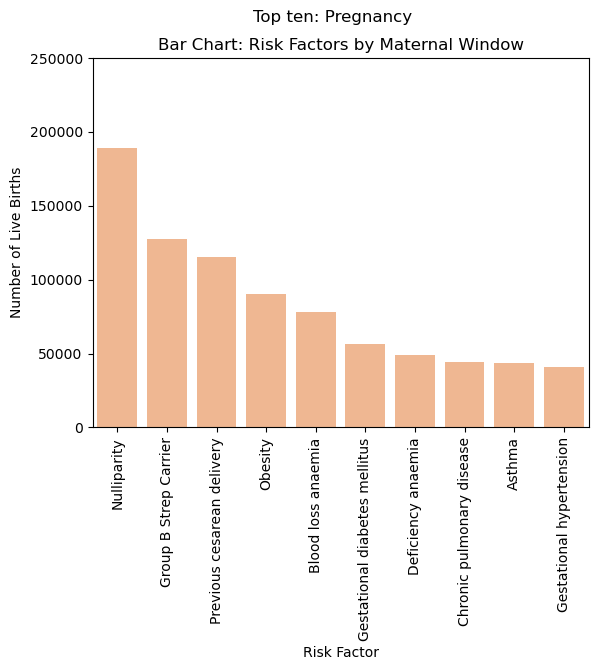

In [130]:
bar_chart_top_10_risk_factors(list_risk_pregnancy, 'Pregnancy', color = pregnancy_color)

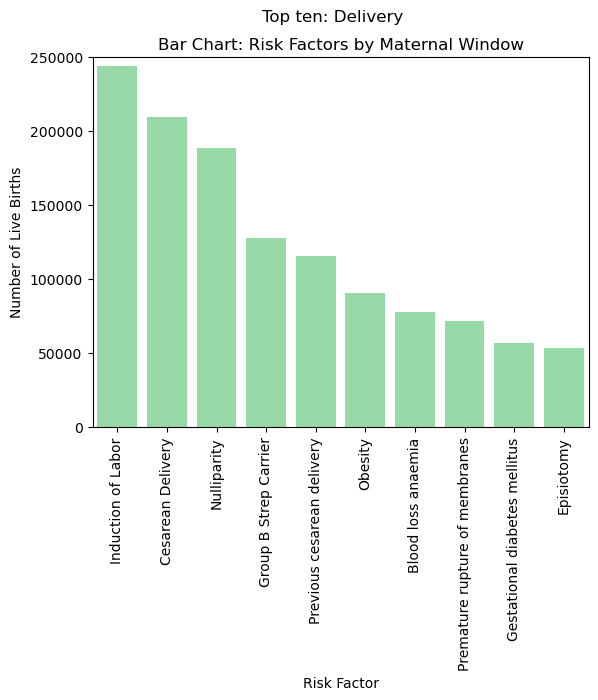

In [131]:
bar_chart_top_10_risk_factors(list_risk_delivery, 'Delivery', color = delivery_color)

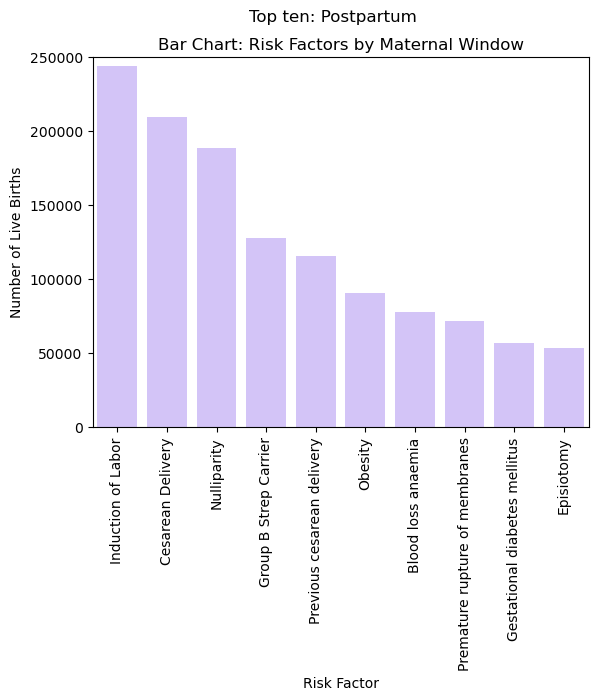

In [132]:
bar_chart_top_10_risk_factors(list_risk_postpartum, 'Postpartum', color = postpartum_color)

### Top ten, any sepsis

In [273]:
def risk_factor_significant(list_risk, maternal_window, color=None, sepsis=None, sepsis_name=None, p_value=None):
    # Daten filtern für den Clustered Bar Chart
    filtered_data = risk_yes[(risk_yes['Risk_Factor'].isin(list_risk)) & (risk_yes['Maternal_Window'].isin([maternal_window]))]

    sorted_data = filtered_data.sort_values('Live_Births_N', ascending=False)
    # Clustered Bar Chart erstellen
    ax = sns.barplot(data=sorted_data, x='Risk_Factor', y='Live_Births_N', color=color)
    plt.xlabel('Risk Factor')
    plt.ylabel('Number of Live Births')
    plt.suptitle('Top 10 Risk Factors ({}) with a significant risk for {} Sepsis'.format(maternal_window, sepsis_name))
    plt.title('Red Bars = significant p-value (<0.05) for {} Sepsis'.format(sepsis_name), fontsize=8)
    plt.xticks(rotation=90)
    plt.ylim(0,250000)
    

    # Balken markieren
    for bar in ax.containers:
        for i in range(len(bar.patches)):
            if filtered_data[p_value].iloc[i] < 0.05:
                bar.patches[i].set_facecolor('red')

    plt.show()


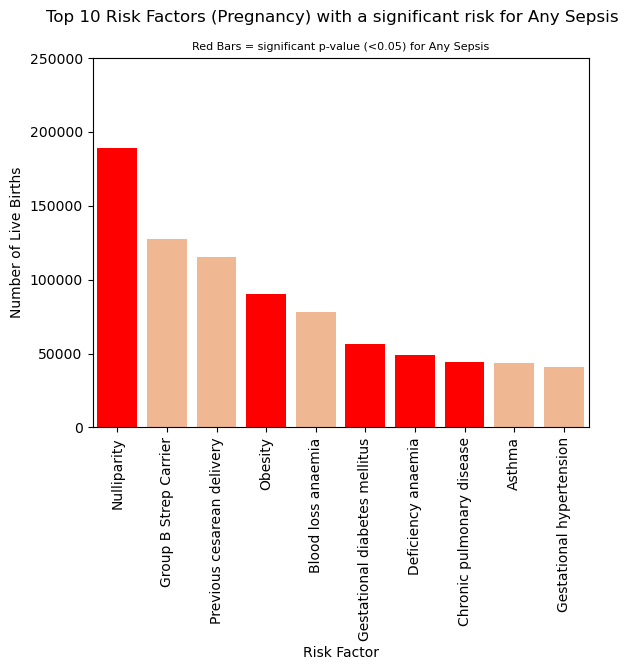

In [274]:
risk_factor_significant(list_risk_pregnancy, 
                        'Pregnancy', 
                        color = pregnancy_color, 
                        sepsis = 'Any_Sepsis_Incidence_per_100000_Live_Births', 
                        sepsis_name = 'Any',
                        p_value = 'Any_Sepsis_p-value')

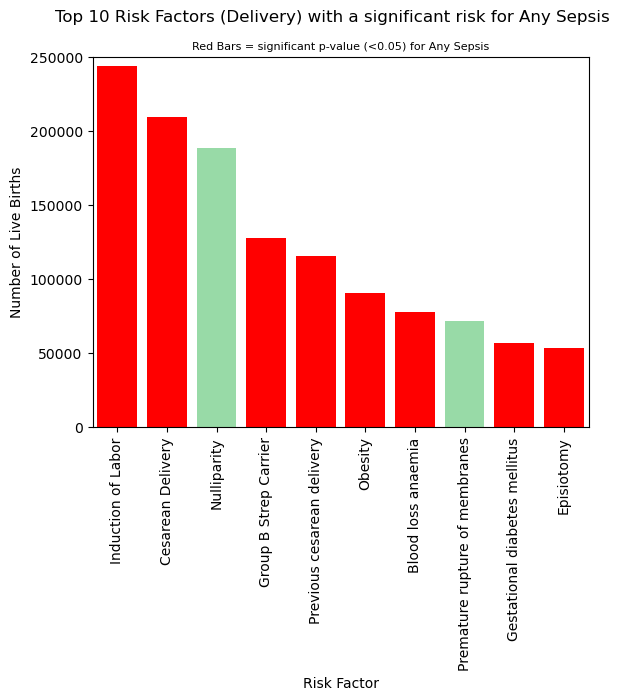

In [275]:
risk_factor_significant(list_risk_delivery, 
                        'Delivery', 
                        color = delivery_color, 
                        sepsis ='Any_Sepsis_Incidence_per_100000_Live_Births', 
                        sepsis_name = 'Any',
                       p_value = 'Any_Sepsis_p-value')

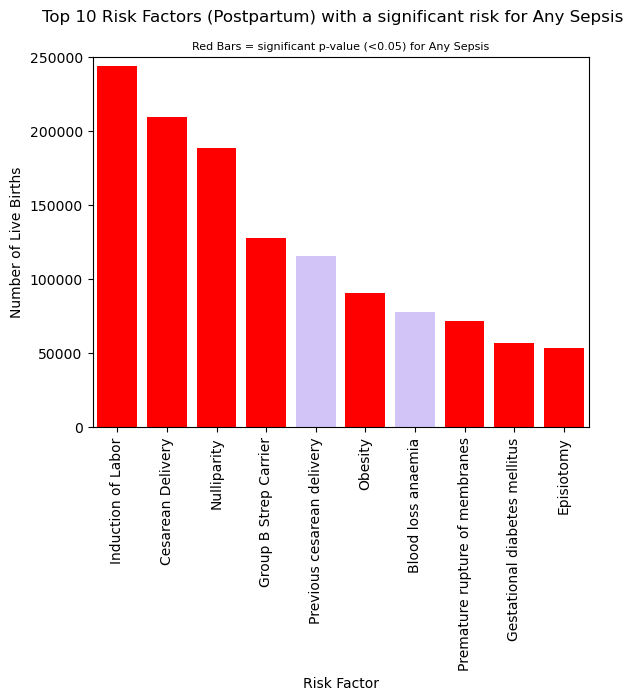

In [276]:
risk_factor_significant(list_risk_postpartum, 
                        'Postpartum', 
                        color = postpartum_color,
                        sepsis ='Any_Sepsis_Incidence_per_100000_Live_Births', 
                        sepsis_name = 'Any', 
                       p_value = 'Any_Sepsis_p-value')

### Top ten, severe sepsis

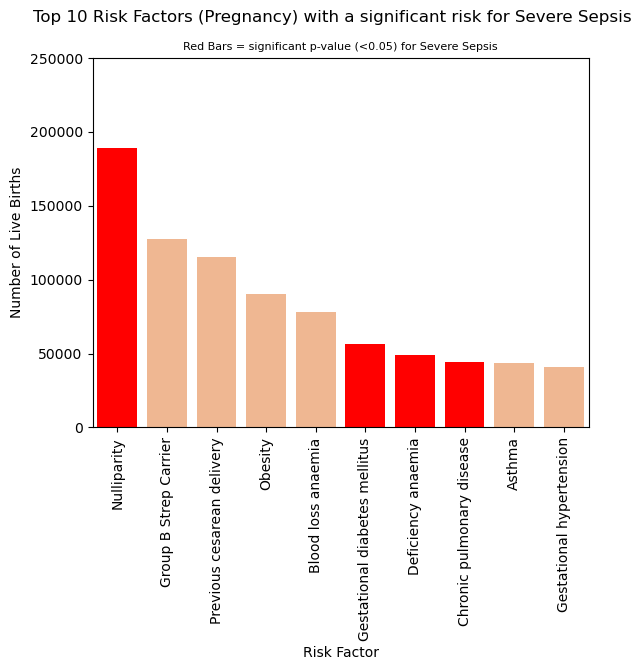

In [277]:
risk_factor_significant(list_risk_pregnancy, 
                        'Pregnancy', 
                        color = pregnancy_color, 
                        sepsis ='Severe_Sepsis_Incidence_per_100000_Live_Births', 
                        sepsis_name = 'Severe',
                        p_value = 'Severe_Sepsis_p-value')

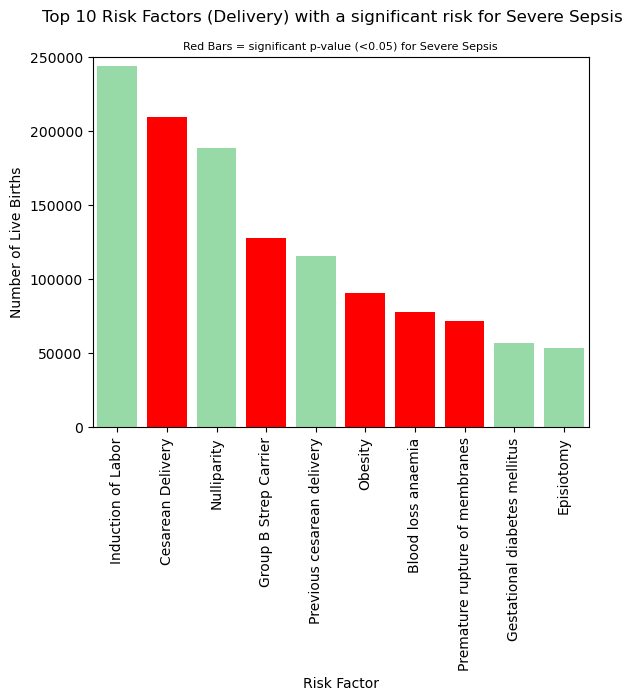

In [278]:
risk_factor_significant(list_risk_delivery, 
                        'Delivery', 
                        color = delivery_color, 
                        sepsis ='Severe_Sepsis_Incidence_per_100000_Live_Births', 
                        sepsis_name = 'Severe',
                       p_value = 'Severe_Sepsis_p-value')

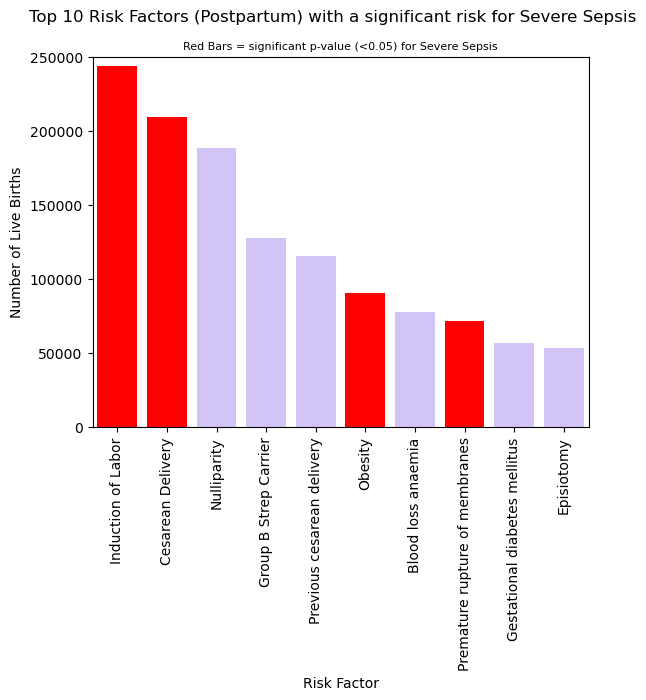

In [279]:
risk_factor_significant(list_risk_postpartum, 
                        'Postpartum', 
                        color = postpartum_color,
                        sepsis ='Severe_Sepsis_Incidence_per_100000_Live_Births', 
                        sepsis_name = 'Severe', 
                       p_value = 'Severe_Sepsis_p-value')

These are the ten most often risk factors that had been discovered in this study.

### Top ten risk factors with a significant risk of a sepsis

a) any sepsis

b) severe sepsis

### a) any sepsis

In [235]:

def significant_top_10(maternal_window = None, sepsis = None, p_value = None):
    risk_factors = set(risk_yes['Risk_Factor'].tolist())
    sum_data = []

    for risk in risk_factors:
        risk_yes_filtered = risk_yes[(risk_yes['Risk_Factor'] == risk)
                                    & (risk_yes['Maternal_Window'] == maternal_window)
                                    & (risk_yes[p_value] < 0.05)]
        risk_yes_sum = risk_yes_filtered[sepsis].sum()
        sum_data.append({'Risk_Factor': risk, sepsis: risk_yes_sum})

    risk_yes_sum = pd.DataFrame(sum_data)

    top_10_risk_factors = risk_yes_sum.sort_values(by=sepsis, ascending=False).head(10)
    top_10_risk_factors = top_10_risk_factors.reset_index(drop=True)
    
    return top_10_risk_factors


In [236]:
significant_any_top_10_during_pregnancy = significant_top_10(maternal_window = 'Pregnancy', 
                                                             sepsis = 'Any_Sepsis_Incidence_per_100000_Live_Births',
                                                             p_value = 'Any_Sepsis_p-value')
significant_any_top_10_during_pregnancy

,Risk_Factor,Any_Sepsis_Incidence_per_100000_Live_Births
0,Pulmonary hypertension,3030.30
1,Fluid and electrolyte disorders,1898.85
2,Peripheral vascular disorders,1831.50
3,Pulmonary circulation disorders,1655.63
4,Chronic renal disease,1450.81
5,Chronic congestive heart failure,1408.45
6,Weight loss,1311.08
7,Metastatic cancer,1298.70
8,History of Sepsis (w/in 1yr prior to start of pregnancy),1192.50
9,Paralysis,1173.02


In [237]:
significant_any_top_10_during_delivery = significant_top_10(maternal_window = 'Delivery', 
                                                            sepsis = 'Any_Sepsis_Incidence_per_100000_Live_Births',
                                                             p_value = 'Any_Sepsis_p-value')
significant_any_top_10_during_delivery

,Risk_Factor,Any_Sepsis_Incidence_per_100000_Live_Births
0,Adult respiratory distress syndrome,17280.45
1,Acute myocardial infarction,16666.67
2,Shock,15345.27
3,Ventilation,14929.58
4,Temporary tracheostomy,14887.64
5,Amniotic fluid embolism,13636.36
6,Cardiac arrest/ventricular fibrillation,12820.51
7,Air and thrombotic embolism,9848.48
8,Acute renal failure,9448.82
9,Puerperal cerebrovascular disorders,6976.74


In [238]:
significant_any_top_10_during_postpartum = significant_top_10(maternal_window = 'Postpartum', 
                                                             sepsis = 'Any_Sepsis_Incidence_per_100000_Live_Births',
                                                             p_value = 'Any_Sepsis_p-value')
significant_any_top_10_during_postpartum

,Risk_Factor,Any_Sepsis_Incidence_per_100000_Live_Births
0,Acute myocardial infarction,5555.56
1,Ventilation,2816.90
2,Temporary tracheostomy,2808.99
3,Puerperal cerebrovascular disorders,2325.58
4,Pulmonary edema / Acute heart failure,2105.26
5,Hysterectomy,1859.80
6,Acute renal failure,1771.65
7,Adult respiratory distress syndrome,1699.72
8,Conversion of cardiac rhythm,1587.30
9,Shock,1534.53


In [177]:
list_significant_any_risk_pregnancy = significant_any_top_10_during_pregnancy['Risk_Factor'].tolist()


In [178]:
list_significant_any_risk_delivery = significant_any_top_10_during_delivery['Risk_Factor'].tolist()

In [179]:
list_significant_any_risk_postpartum= significant_any_top_10_during_postpartum['Risk_Factor'].tolist()

In [213]:
def risk_factor_significant(list_risk, maternal_window=None, color=None, sepsis=None, sepsis_name=None, p_value=None):
    # Daten filtern für den Clustered Bar Chart
    filtered_data = risk_yes[(risk_yes['Risk_Factor'].isin(list_risk)) & (risk_yes['Maternal_Window'].isin([maternal_window]))]
    
    sorted_data = filtered_data.sort_values(sepsis, ascending=False)

    # Clustered Bar Chart erstellen
    ax = sns.barplot(data=sorted_data, x='Risk_Factor', y=sepsis, color=color)
    plt.xlabel('Risk Factor')
    plt.ylabel('{} Sepsis Incidence per 100,000 Live Births'.format(sepsis_name))
    plt.suptitle('Top ten risk Factors for {} Sepsis Incidence (significant p-Value)'.format(sepsis_name))
    plt.title(maternal_window)
    plt.xticks(rotation=90)
    plt.ylim(0,20000)

   

    plt.show()


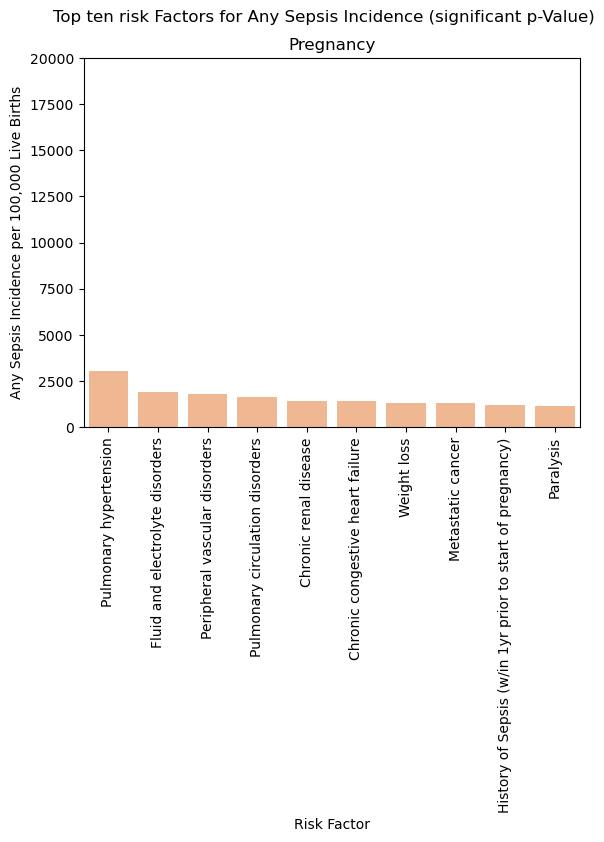

In [214]:
risk_factor_significant(list_significant_any_risk_pregnancy, 
                        maternal_window ='Pregnancy', 
                        color=pregnancy_color, 
                        sepsis ='Any_Sepsis_Incidence_per_100000_Live_Births', 
                        sepsis_name = 'Any',
                        p_value = 'Any_Sepsis_p-value')

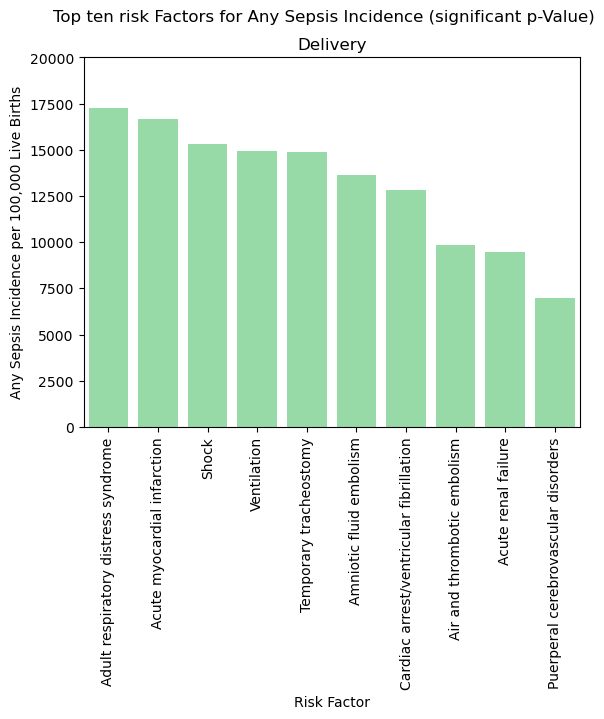

In [215]:
risk_factor_significant(list_significant_any_risk_delivery, 
                        maternal_window ='Delivery', 
                        color=delivery_color, 
                        sepsis ='Any_Sepsis_Incidence_per_100000_Live_Births', 
                        sepsis_name = 'Any',
                        p_value = 'Any_Sepsis_p-value')

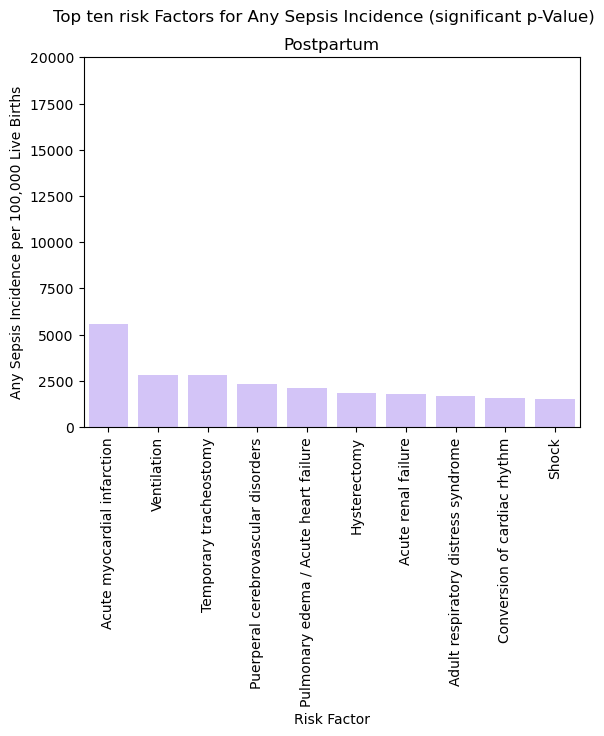

In [216]:
risk_factor_significant(list_significant_any_risk_postpartum, 
                        maternal_window ='Postpartum', 
                        color=postpartum_color, 
                        sepsis ='Any_Sepsis_Incidence_per_100000_Live_Births', 
                        sepsis_name = 'Any',
                        p_value = 'Any_Sepsis_p-value')

### b) severe sepsis

In [241]:
significant_severe_top_10_during_pregnancy = significant_top_10(maternal_window = 'Pregnancy', 
                                                             sepsis = 'Severe_Sepsis_Incidence_per_100000_Live_Births',
                                                             p_value = 'Severe_Sepsis_p-value')
significant_severe_top_10_during_pregnancy

,Risk_Factor,Severe_Sepsis_Incidence_per_100000_Live_Births
0,Pulmonary hypertension,1136.36
1,Chronic congestive heart failure,704.23
2,Fluid and electrolyte disorders,559.01
3,Chronic ischemic heart disease,518.13
4,Weight loss,476.76
5,Cardiac arrhythmias,465.12
6,Peripheral vascular disorders,366.30
7,History of Sepsis (w/in 1yr prior to start of pregnancy),340.72
8,Pulmonary circulation disorders,331.13
9,Paralysis,293.26


In [242]:
significant_severe_top_10_during_delivery = significant_top_10(maternal_window = 'Delivery', 
                                                             sepsis = 'Severe_Sepsis_Incidence_per_100000_Live_Births',
                                                             p_value = 'Severe_Sepsis_p-value')
significant_severe_top_10_during_delivery

,Risk_Factor,Severe_Sepsis_Incidence_per_100000_Live_Births
0,Acute myocardial infarction,16666.67
1,Ventilation,10985.92
2,Temporary tracheostomy,10955.06
3,Shock,10485.93
4,Adult respiratory distress syndrome,9348.44
5,Amniotic fluid embolism,9090.91
6,Cardiac arrest/ventricular fibrillation,7692.31
7,Puerperal cerebrovascular disorders,4651.16
8,Air and thrombotic embolism,4545.45
9,Acute renal failure,3937.01


In [243]:
significant_severe_top_10_during_postpartum = significant_top_10(maternal_window = 'Postpartum', 
                                                             sepsis = 'Severe_Sepsis_Incidence_per_100000_Live_Births',
                                                             p_value = 'Severe_Sepsis_p-value')
significant_severe_top_10_during_postpartum

,Risk_Factor,Severe_Sepsis_Incidence_per_100000_Live_Births
0,Acute myocardial infarction,5555.56
1,Ventilation,1971.83
2,Temporary tracheostomy,1966.29
3,Conversion of cardiac rhythm,1587.30
4,Metastatic cancer,1298.70
5,Acute renal failure,984.25
6,Shock,767.26
7,Organ Transplant,606.06
8,Adult respiratory distress syndrome,566.57
9,Pulmonary edema / Acute heart failure,526.32


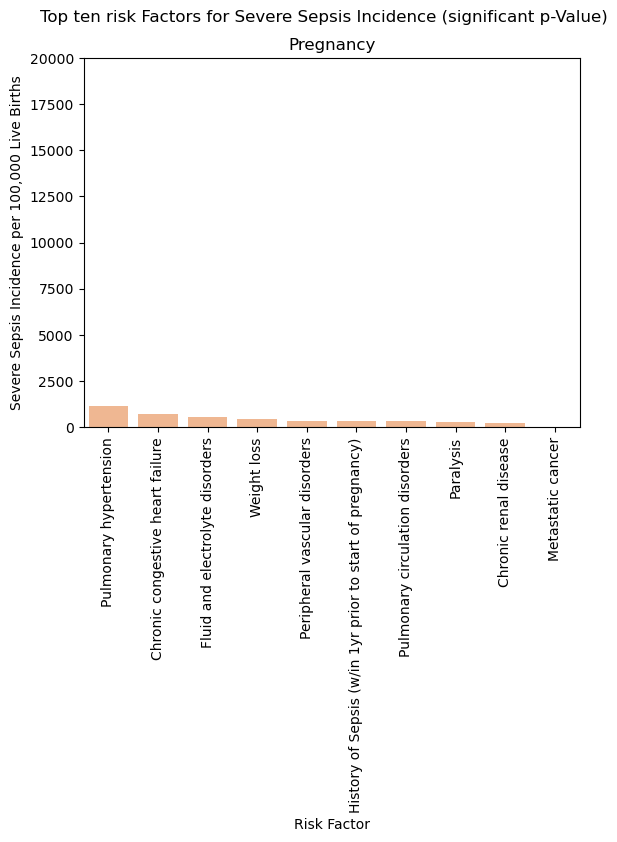

In [217]:
risk_factor_significant(list_significant_any_risk_pregnancy, 
                        maternal_window ='Pregnancy', 
                        color=pregnancy_color, 
                        sepsis ='Severe_Sepsis_Incidence_per_100000_Live_Births', 
                        sepsis_name = 'Severe',
                        p_value = 'Severe_Sepsis_p-value')

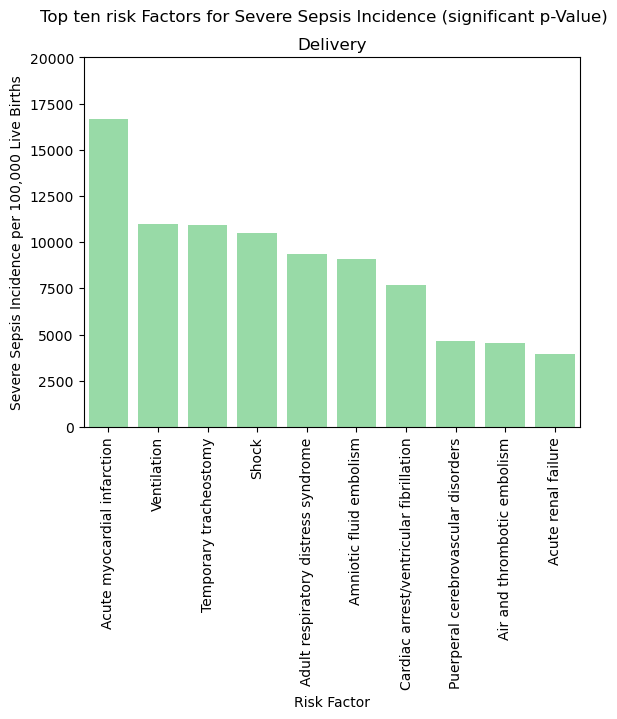

In [218]:
risk_factor_significant(list_significant_any_risk_delivery, 
                        maternal_window ='Delivery', 
                        color=delivery_color, 
                        sepsis ='Severe_Sepsis_Incidence_per_100000_Live_Births', 
                        sepsis_name = 'Severe',
                        p_value = 'Severe_Sepsis_p-value')

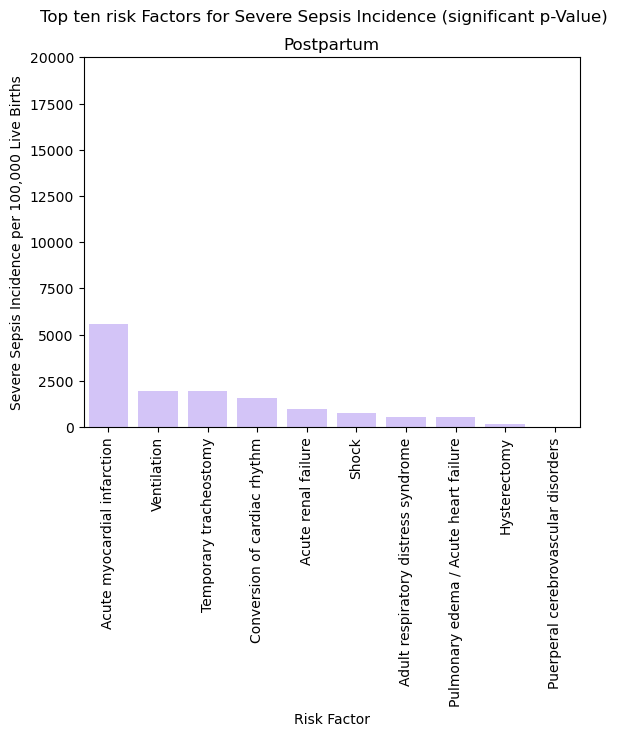

In [219]:
risk_factor_significant(list_significant_any_risk_postpartum, 
                        maternal_window ='Postpartum', 
                        color=postpartum_color, 
                        sepsis ='Severe_Sepsis_Incidence_per_100000_Live_Births', 
                        sepsis_name = 'Severe',
                        p_value = 'Severe_Sepsis_p-value')

## Scatterplot

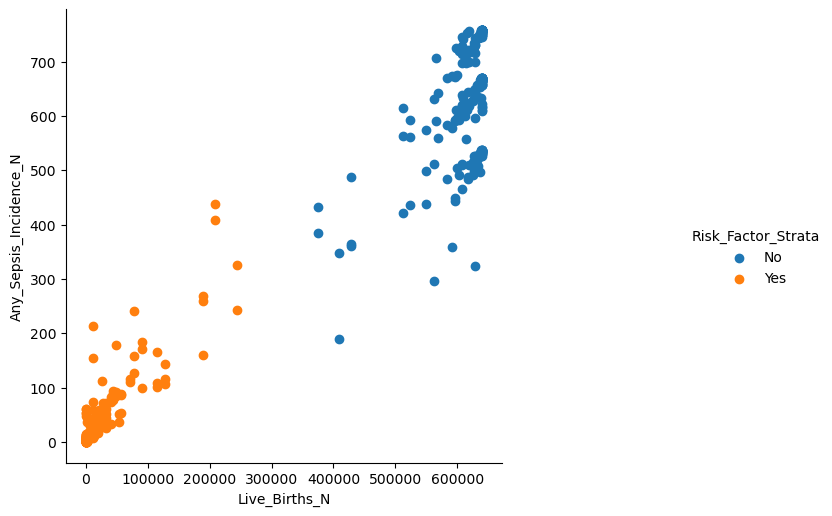

In [296]:
g = sns.FacetGrid(data=risk_yes_no, hue='Risk_Factor_Strata')
g.map(plt.scatter, 'Live_Births_N', 'Any_Sepsis_Incidence_N')
g.add_legend()

# Größe des Plots anpassen
g.fig.set_size_inches(10, 6)  

plt.show()



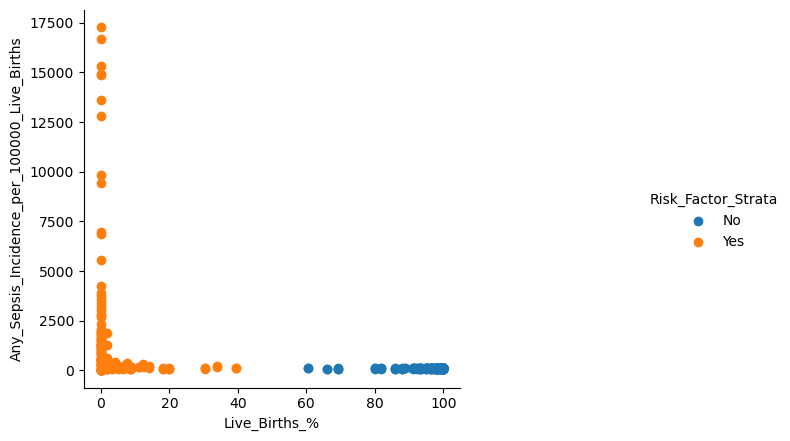

In [307]:
g = sns.FacetGrid(data=risk_yes_no, hue='Risk_Factor_Strata')
g.map(plt.scatter, 'Live_Births_%', 'Any_Sepsis_Incidence_per_100000_Live_Births')
g.add_legend()

# Größe des Plots anpassen
g.fig.set_size_inches(10, 5)  

plt.show()


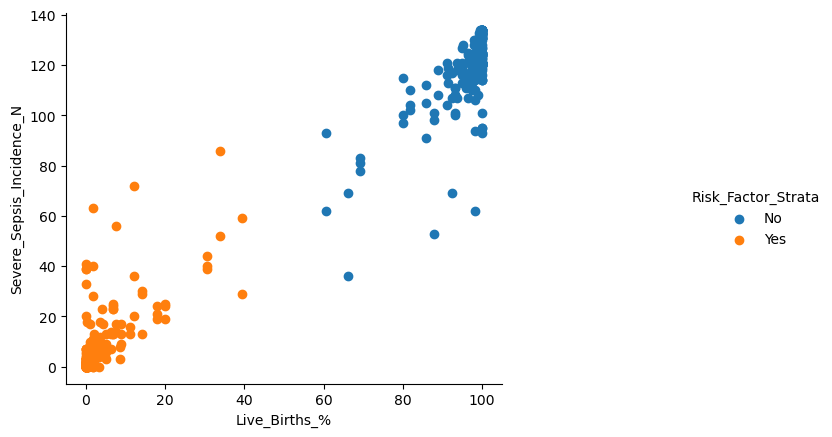

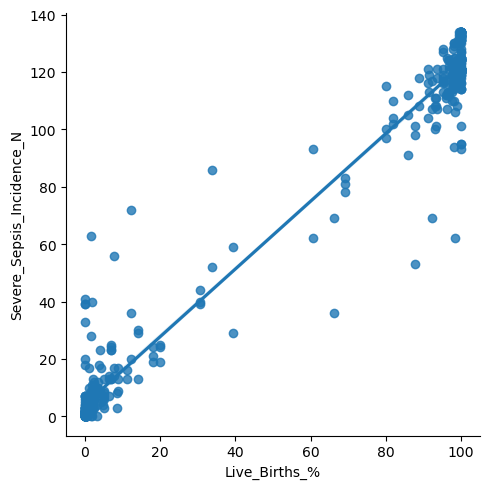

In [316]:
g = sns.FacetGrid(data=risk_yes_no, hue='Risk_Factor_Strata')
g.map(plt.scatter, 'Live_Births_%', 'Severe_Sepsis_Incidence_N')
g.add_legend()

# Größe des Plots anpassen
g.fig.set_size_inches(10, 5)  


plt.show()


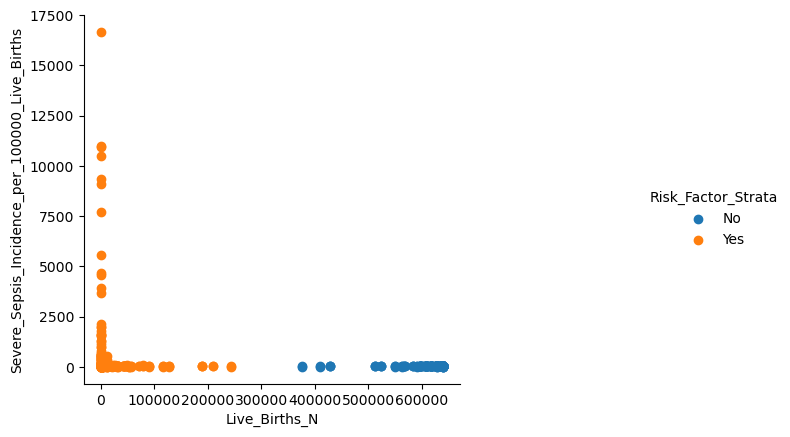

In [309]:
g = sns.FacetGrid(data=risk_yes_no, hue='Risk_Factor_Strata')
g.map(plt.scatter, 'Live_Births_N', 'Severe_Sepsis_Incidence_per_100000_Live_Births')
g.add_legend()

# Größe des Plots anpassen
g.fig.set_size_inches(10, 5)  

plt.show()

## Cluster

C:\Users\Laura Hagg\Anaconda3\envs\Data_Scientist\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Laura Hagg\Anaconda3\envs\Data_Scientist\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


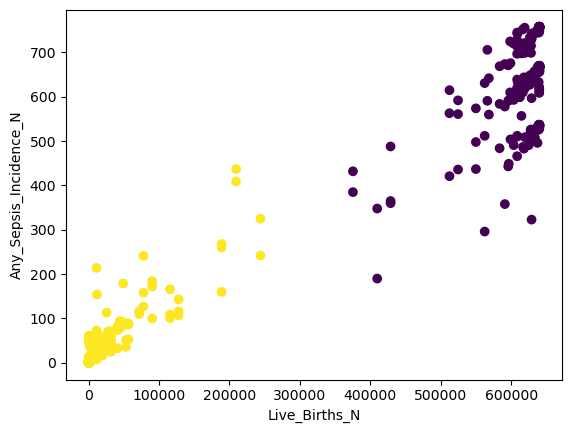

In [315]:
from sklearn.cluster import KMeans

# Daten für den Scatterplot
x = risk_yes_no['Live_Births_N']
y = risk_yes_no['Any_Sepsis_Incidence_N']

# Zusammenführen der Datenpunkte zu einer Feature-Matrix
X = np.column_stack((x, y))

# K-Means-Clustering durchführen
kmeans = KMeans(n_clusters=2)  # Anzahl der gewünschten Cluster festlegen
kmeans.fit(X)

# Cluster-Zuordnungen für die Datenpunkte erhalten
labels = kmeans.labels_

# Scatterplot mit Clustern anzeigen
plt.scatter(x, y, c=labels)
plt.xlabel('Live_Births_N')
plt.ylabel('Any_Sepsis_Incidence_N')
plt.show()


## Filter for significant risk of a sepsis

In [264]:
def risk_filter(maternal_window = None, risk_factor=None, sepsis_type=None, p_value=None):
    # Filter the DataFrame for the specified risk factor
    df_risk = filtered_data = df[(df['Risk_Factor'].isin([risk_factor])) & 
                                       (df['Maternal_Window'].isin([maternal_window]))]

    # Filter the relevant columns
    df_risk = df_risk[['Risk_Factor', 'Maternal_Window', sepsis_type, p_value]]

    # Remove rows with missing values
    df_risk = df_risk.dropna()

    # Define a significance threshold
    significance_threshold = 0.05

    # Predict sepsis probability based on the p-value
    df_risk['Sepsis_Prediction'] = df_risk[p_value] < significance_threshold
    
    if df_risk['Sepsis_Prediction'].any():
        print('With this combination you have a statistically significant risk of getting sepsis. ')

    # Display the resulting DataFrame
    return df_risk


In [266]:
risk_filter(maternal_window = 'Delivery',
    risk_factor = 'Alcohol Use',
sepsis_type = 'Severe_Sepsis_Incidence_per_100000_Live_Births',
p_value = 'Severe_Sepsis_p-value')

With this combinaion you have a statistically significant risk of getting sepsis. 


,Risk_Factor,Maternal_Window,Severe_Sepsis_Incidence_per_100000_Live_Births,Severe_Sepsis_p-value,Sepsis_Prediction
240,Alcohol Use,Delivery,36.66,0.3609,False
241,Alcohol Use,Delivery,201.88,0.0001,True
